In [8]:
# Notebook prepared by Jesus Cantu 

# Load required packages and data 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# File Path
file_path = "/Users/jesuscantu/Desktop/Workspace/MiningSoftwareRepositories/RawData/Issues/"

# Get list of files in directory containing data for a GitHub Repository's Issues 
import os
 
for x in os.listdir(file_path):
    if x.endswith(".csv"):
        # Prints only text file present in My Folder
        print(x)

scikit-learn_scikit-learn_issue_data.csv


In [23]:
# Load stationary copy of the data using owner and repo name 
owner = "scikit-learn"
repo_name = "scikit-learn"
issues_df = pd.read_csv(f"{file_path}{owner}_{repo_name}_issue_data.csv")

In [24]:
issues_df.head(15)

,State,Labels,Assignees,Comments,Created At,Closed At,Locked
0,open,module:metrics,NaN,0,2023-03-27T20:45:49Z,NaN,False
1,open,module:datasets,NaN,0,2023-03-27T20:45:29Z,NaN,False
2,open,"Documentation,Needs Triage",NaN,0,2023-03-27T19:51:41Z,NaN,False
3,open,module:feature_selection,NaN,0,2023-03-27T19:32:00Z,NaN,False
4,open,module:datasets,NaN,0,2023-03-27T19:23:51Z,NaN,False
5,open,"New Feature,Needs Triage",NaN,0,2023-03-27T19:23:13Z,NaN,False
6,open,"Documentation,Enhancement",NaN,1,2023-03-27T13:58:05Z,NaN,False
7,open,module:cross_decomposition,NaN,0,2023-03-27T05:39:10Z,NaN,False
8,open,"Documentation,module:gaussian_process",NaN,0,2023-03-26T19:18:23Z,NaN,False
9,open,"Documentation,Needs Triage",NaN,0,2023-03-26T15:17:54Z,NaN,False


In [29]:
issues_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   State          30 non-null     object             
 1   Labels         30 non-null     object             
 2   Assignees      1 non-null      object             
 3   Comments       30 non-null     int64              
 4   Created At     30 non-null     datetime64[ns, UTC]
 5   Closed At      9 non-null      datetime64[ns, UTC]
 6   Locked         30 non-null     bool               
 7   Day Created    30 non-null     int64              
 8   Week Created   30 non-null     UInt32             
 9   Month Created  30 non-null     int64              
 10  Year Created   30 non-null     int64              
 11  Time Created   30 non-null     object             
 12  Hour Created   30 non-null     int64              
 13  Day Closed     9 non-null      float64            
 

In [26]:
# Convert 'Created At' column to datetime format
issues_df['Created At'] = pd.to_datetime(issues_df['Created At'])

# Create columns from 'Created At' for day, week, month, year, time, and hour
issues_df['Day Created'] = issues_df['Created At'].dt.day
issues_df['Week Created'] = issues_df['Created At'].dt.isocalendar().week
issues_df['Month Created'] = issues_df['Created At'].dt.month
issues_df['Year Created'] = issues_df['Created At'].dt.year
issues_df['Time Created'] = issues_df['Created At'].dt.time
issues_df['Hour Created'] = issues_df['Created At'].dt.hour

# Note that the Week column uses the isocalendar() method to get the week number, 
# since the standard week method can return inconsistent results depending on the specific calendar used.

In [28]:
# Convert 'Closed At' column to datetime format
issues_df['Closed At'] = pd.to_datetime(issues_df['Closed At'])

# Create columns from 'Closed At' for day, week, month, year, time, and hour
issues_df['Day Closed'] = issues_df['Closed At'].dt.day
issues_df['Week Closed'] = issues_df['Closed At'].dt.isocalendar().week
issues_df['Month Closed'] = issues_df['Closed At'].dt.month
issues_df['Year Closed'] = issues_df['Closed At'].dt.year
issues_df['Time Closed'] = issues_df['Closed At'].dt.time
issues_df['Hour Closed'] = issues_df['Closed At'].dt.hour

# Note that the Week column uses the isocalendar() method to get the week number, 
# since the standard week method can return inconsistent results depending on the specific calendar used.

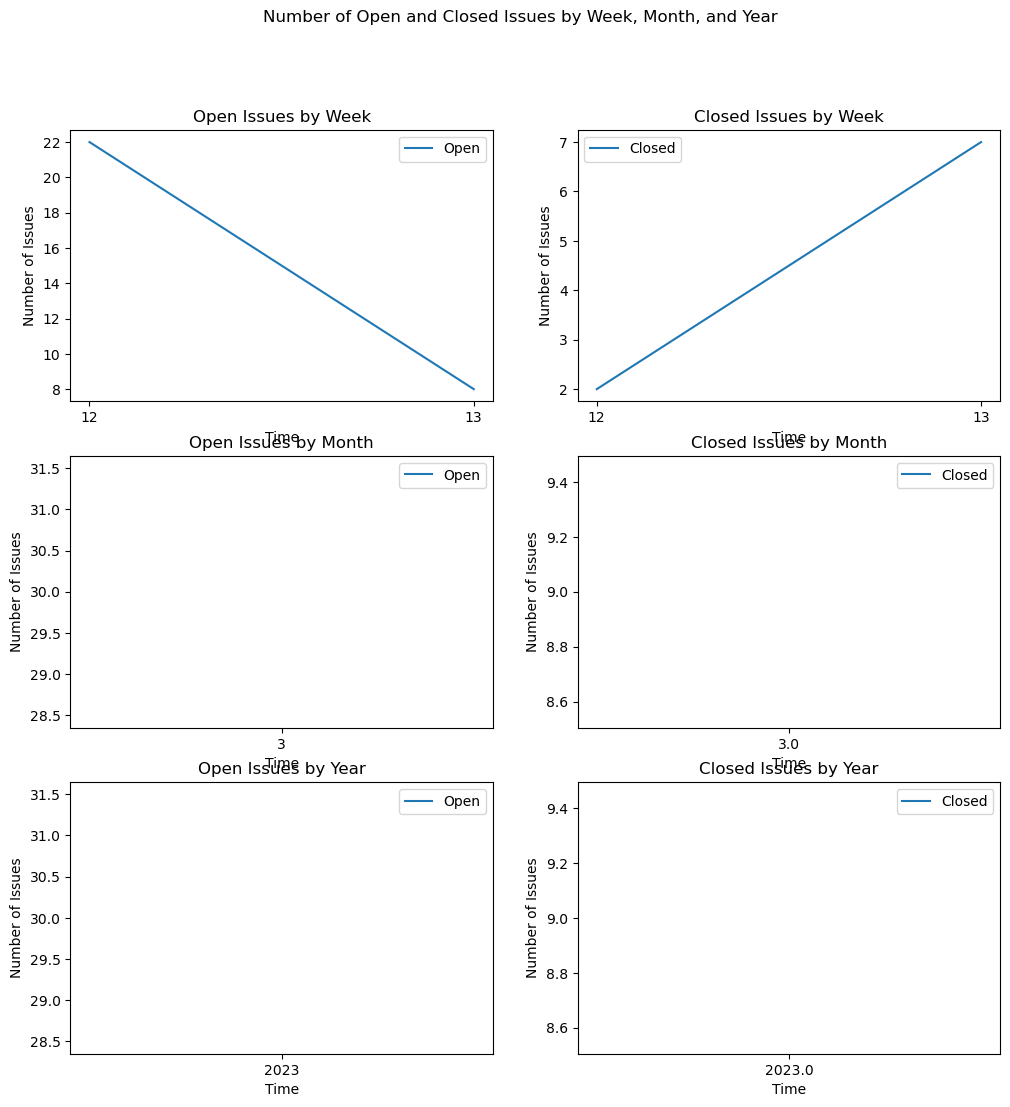

In [31]:
# Visualize the  number of open and closed issues by month and year
# group the data by year and month of creation
by_month_created = issues_df.groupby(['Year Created', 'Month Created']).size()
by_month_closed = issues_df[issues_df['Closed At'].notnull()].groupby(['Year Closed', 'Month Closed']).size()

# plot the results
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Number of Open and Closed Issues by Month and Year')

# plot the number of open issues by month
axs[0, 0].plot(by_month_created, label='Open')
axs[0, 0].set_title('Open Issues by Month')
axs[0, 0].set(xlabel='Time', ylabel='Number of Issues')

# plot the number of closed issues by month
axs[1, 0].plot(by_month_closed, label='Closed')
axs[1, 0].set_title('Closed Issues by Month')
axs[1, 0].set(xlabel='Time', ylabel='Number of Issues')

# group the data by year of creation
by_year_created = issues_df.groupby(['Year Created']).size()
by_year_closed = issues_df[issues_df['Closed At'].notnull()].groupby(['Year Closed']).size()

# plot the number of open issues by year
axs[0, 1].plot(by_year_created, label='Open')
axs[0, 1].set_title('Open Issues by Year')
axs[0, 1].set(xlabel='Time', ylabel='Number of Issues')

# plot the number of closed issues by year
axs[1, 1].plot(by_year_closed, label='Closed')
axs[1, 1].set_title('Closed Issues by Year')
axs[1, 1].set(xlabel='Time', ylabel='Number of Issues')

# add legends
axs[0, 0].legend()
axs[1, 0].legend()
axs[0, 1].legend()
axs[1, 1].legend()

# display the plot
plt.show()